# Analysis of results

## Level 1 + Baseline

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load the samples JSONL file
samples_file = "samples_pubmedqa_generation_L1.jsonl"

answers = []
with open(samples_file, 'r') as f:
    for line in f:
        sample = json.loads(line)
        # filtered_resps is a list, get the first element
        filtered_resp = sample.get('filtered_resps', ['[invalid]'])[0]
        # Normalize the answer (lowercase, strip whitespace)
        answer = filtered_resp.lower().strip() if filtered_resp else '[invalid]'
        answers.append(answer)

# Count occurrences
answer_counts = Counter(answers)

# Prepare data for plotting
categories = ['yes', 'no', 'maybe', '[invalid]']
counts = [answer_counts.get(cat, 0) for cat in categories]

print("Answer Distribution:")
for cat, count in zip(categories, counts):
    print(f"  {cat}: {count} ({count/len(answers)*100:.1f}%)")
print(f"\nTotal samples: {len(answers)}")


Answer Distribution:
  yes: 341 (68.2%)
  no: 0 (0.0%)
  maybe: 0 (0.0%)
  [invalid]: 159 (31.8%)

Total samples: 500


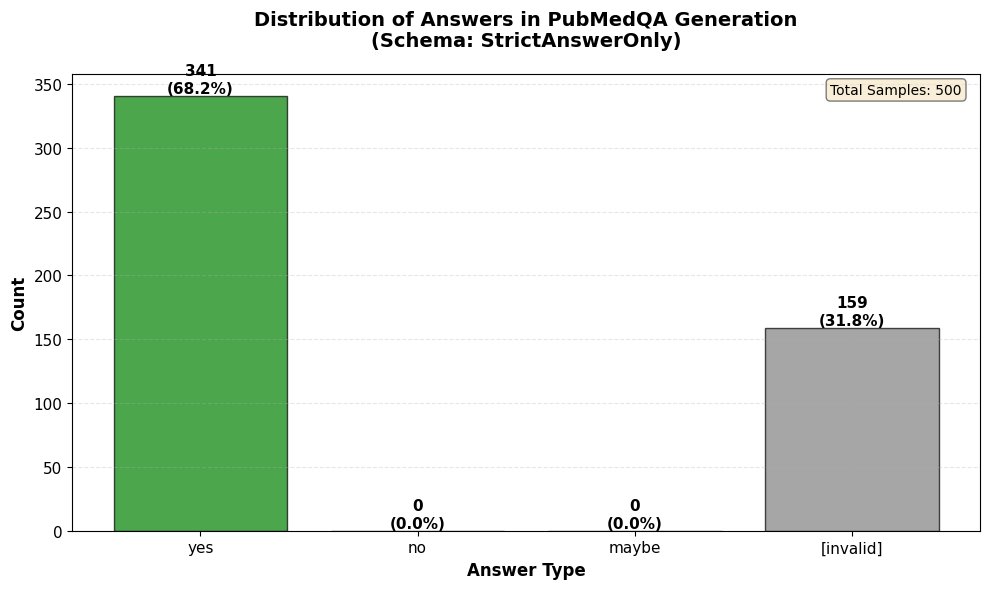

In [2]:
# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')

# Add value labels on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Answer Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Answers in PubMedQA Generation\n(Schema: StrictAnswerOnly)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add total count annotation
plt.text(0.98, 0.98, f'Total Samples: {len(answers)}', 
         transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


### Baseline with sglang_schema

In [ ]:
# Load the baseline (no schema) samples JSONL file
baseline_samples_file = "samples_pubmedqa_generation_baseline.jsonl"

baseline_answers = []
with open(baseline_samples_file, 'r') as f:
    for line in f:
        sample = json.loads(line)
        # filtered_resps is a list, get the first element
        filtered_resp = sample.get('filtered_resps', ['[invalid]'])[0]
        # Normalize the answer (lowercase, strip whitespace)
        answer = filtered_resp.lower().strip() if filtered_resp else '[invalid]'
        baseline_answers.append(answer)

# Count occurrences
baseline_answer_counts = Counter(baseline_answers)

# Prepare data for plotting
baseline_categories = ['yes', 'no', 'maybe', '[invalid]']
baseline_counts = [baseline_answer_counts.get(cat, 0) for cat in baseline_categories]

print("Baseline (No Schema) Answer Distribution:")
for cat, count in zip(baseline_categories, baseline_counts):
    print(f"  {cat}: {count} ({count/len(baseline_answers)*100:.1f}%)")
print(f"\nTotal samples: {len(baseline_answers)}")


Baseline (No Schema) Answer Distribution:
  yes: 213 (42.6%)
  no: 0 (0.0%)
  maybe: 28 (5.6%)
  [invalid]: 259 (51.8%)

Total samples: 500


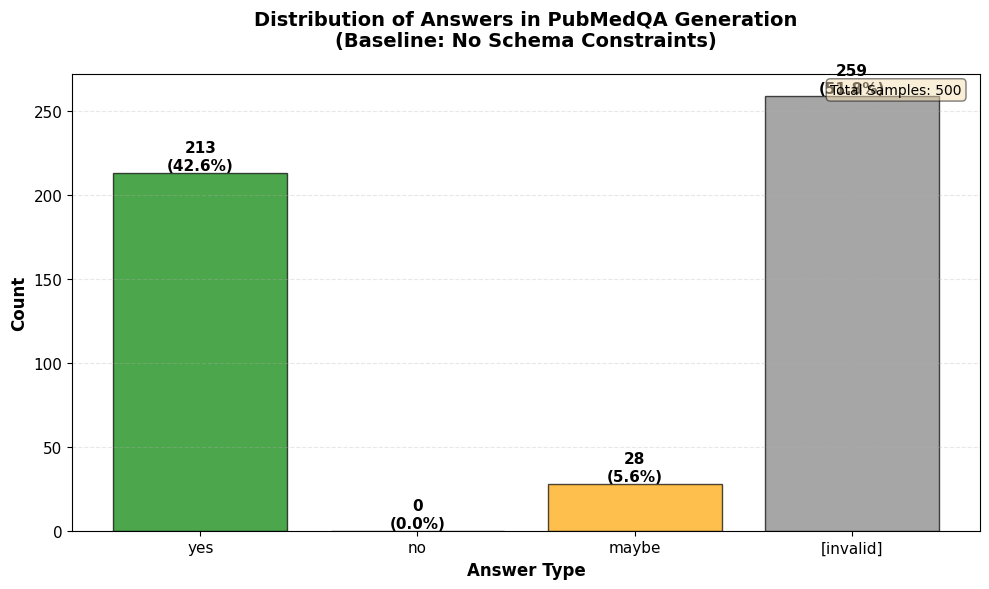

In [ ]:
# Create bar chart for baseline
plt.figure(figsize=(10, 6))
bars = plt.bar(baseline_categories, baseline_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')

# Add value labels on top of bars
for bar, count in zip(bars, baseline_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(baseline_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Answer Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Answers in PubMedQA Generation\n(Baseline: No Schema Constraints)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add total count annotation
plt.text(0.98, 0.98, f'Total Samples: {len(baseline_answers)}', 
         transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


### Baseline with sglang_generate_API

In [8]:
# Load the other baseline samples JSONL file
baseline_other_samples_file = "samples_pubmedqa_generation_baseline_other.jsonl"

baseline_other_answers = []
with open(baseline_other_samples_file, 'r') as f:
    for line in f:
        sample = json.loads(line)
        # filtered_resps is a list, get the first element
        filtered_resp = sample.get('filtered_resps', ['[invalid]'])[0]
        # Normalize the answer (lowercase, strip whitespace)
        answer = filtered_resp.lower().strip() if filtered_resp else '[invalid]'
        baseline_other_answers.append(answer)

# Count occurrences
baseline_other_answer_counts = Counter(baseline_other_answers)

# Prepare data for plotting
baseline_other_categories = ['yes', 'no', 'maybe', '[invalid]']
baseline_other_counts = [baseline_other_answer_counts.get(cat, 0) for cat in baseline_other_categories]

print("Baseline Other (No Schema) Answer Distribution:")
for cat, count in zip(baseline_other_categories, baseline_other_counts):
    print(f"  {cat}: {count} ({count/len(baseline_other_answers)*100:.1f}%)")
print(f"\nTotal samples: {len(baseline_other_answers)}")


Baseline Other (No Schema) Answer Distribution:
  yes: 213 (42.6%)
  no: 0 (0.0%)
  maybe: 28 (5.6%)
  [invalid]: 259 (51.8%)

Total samples: 500


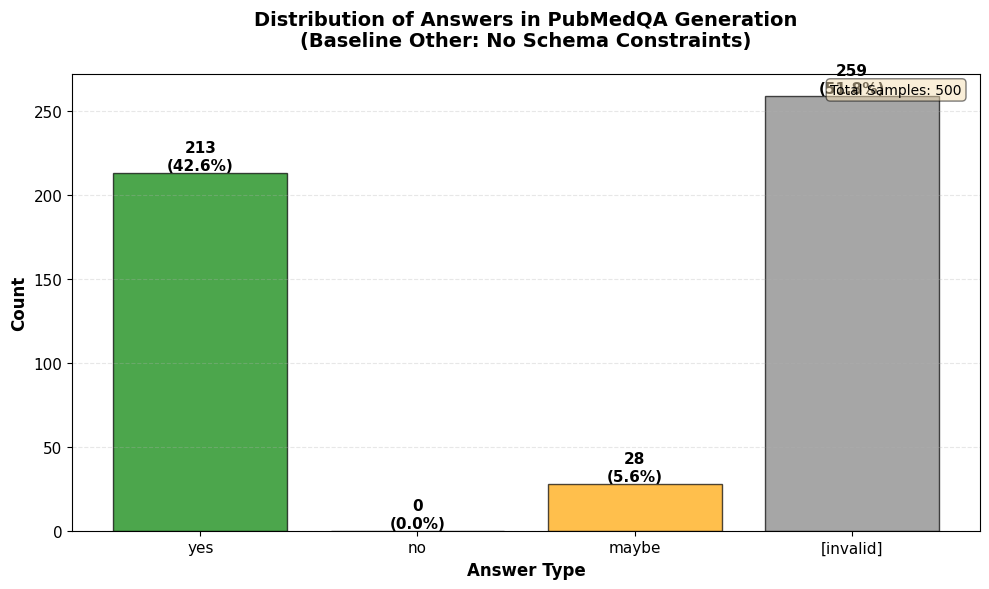

In [9]:
# Create bar chart for baseline other
plt.figure(figsize=(10, 6))
bars = plt.bar(baseline_other_categories, baseline_other_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')

# Add value labels on top of bars
for bar, count in zip(bars, baseline_other_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(baseline_other_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Answer Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Answers in PubMedQA Generation\n(Baseline Other: No Schema Constraints)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add total count annotation
plt.text(0.98, 0.98, f'Total Samples: {len(baseline_other_answers)}', 
         transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


### Comparison of the 3 above

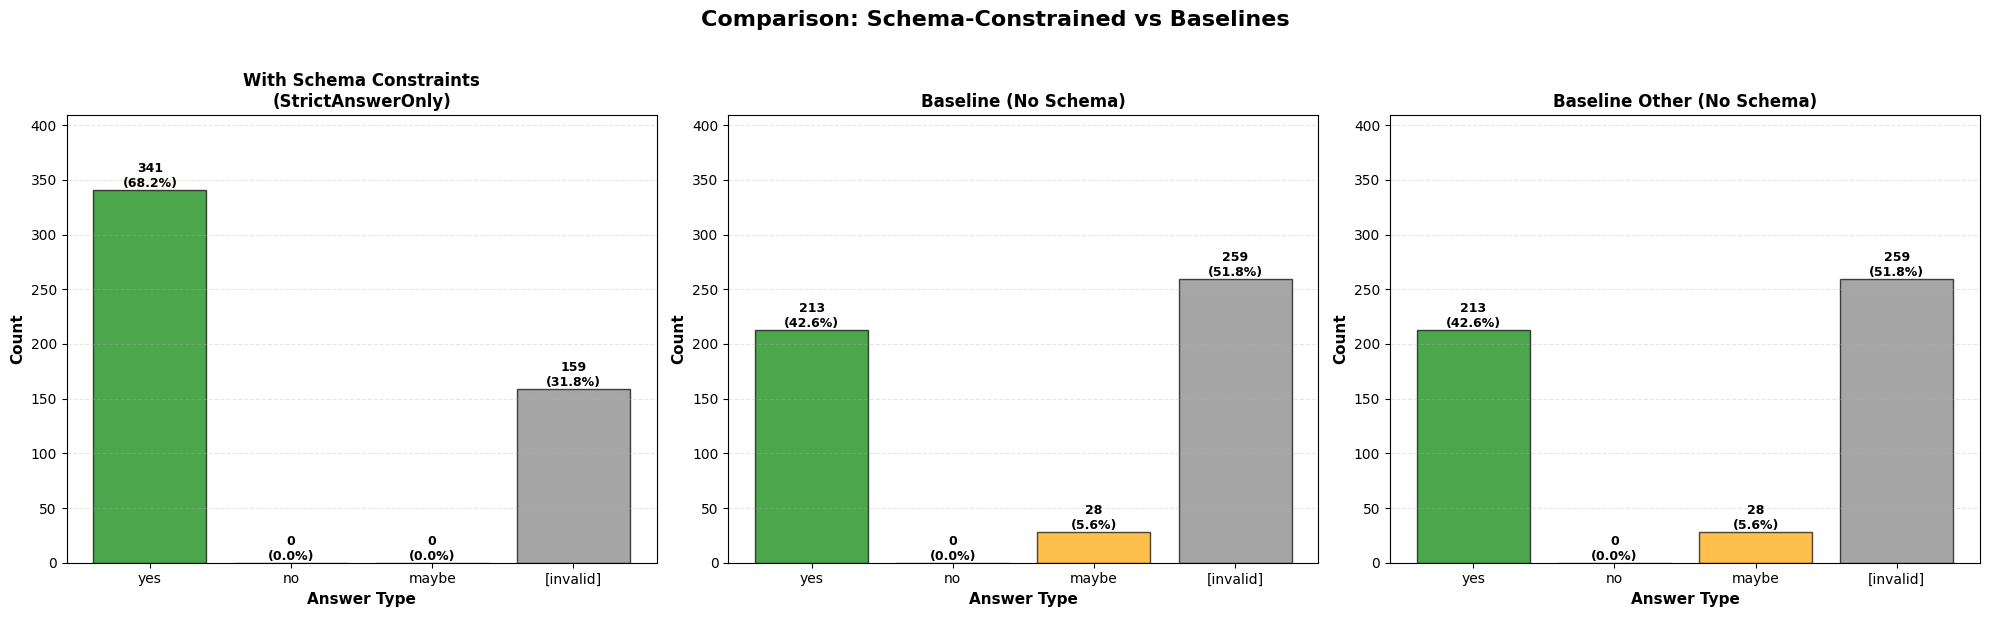


COMPARISON SUMMARY

Schema-Constrained (StrictAnswerOnly):
  Valid answers (yes+no+maybe): 341 (68.2%)
  Invalid answers: 159 (31.8%)

Baseline (No Schema):
  Valid answers (yes+no+maybe): 241 (48.2%)
  Invalid answers: 259 (51.8%)

Baseline Other (No Schema):
  Valid answers (yes+no+maybe): 241 (48.2%)
  Invalid answers: 259 (51.8%)



In [10]:
# Side-by-side comparison chart (all three datasets)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

max_count = max(max(counts), max(baseline_counts), max(baseline_other_counts))

# Schema-constrained results
bars1 = ax1.bar(categories, counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars1, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax1.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax1.set_ylabel('Count', fontsize=11, fontweight='bold')
ax1.set_title('With Schema Constraints\n(StrictAnswerOnly)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim([0, max_count * 1.2])

# Baseline (no schema) results
bars2 = ax2.bar(baseline_categories, baseline_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars2, baseline_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(baseline_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax2.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax2.set_ylabel('Count', fontsize=11, fontweight='bold')
ax2.set_title('Baseline (No Schema)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim([0, max_count * 1.2])

# Baseline Other (no schema) results
bars3 = ax3.bar(baseline_other_categories, baseline_other_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars3, baseline_other_counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(baseline_other_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax3.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax3.set_ylabel('Count', fontsize=11, fontweight='bold')
ax3.set_title('Baseline Other (No Schema)', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3, linestyle='--')
ax3.set_ylim([0, max_count * 1.2])

plt.suptitle('Comparison: Schema-Constrained vs Baselines', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print comparison summary
schema_valid = counts[0] + counts[1] + counts[2]
schema_valid_pct = (schema_valid / len(answers) * 100) if len(answers) > 0 else 0
schema_invalid_pct = (counts[3] / len(answers) * 100) if len(answers) > 0 else 0
baseline_valid = baseline_counts[0] + baseline_counts[1] + baseline_counts[2]
baseline_valid_pct = (baseline_valid / len(baseline_answers) * 100) if len(baseline_answers) > 0 else 0
baseline_invalid_pct = (baseline_counts[3] / len(baseline_answers) * 100) if len(baseline_answers) > 0 else 0
baseline_other_valid = baseline_other_counts[0] + baseline_other_counts[1] + baseline_other_counts[2]
baseline_other_valid_pct = (baseline_other_valid / len(baseline_other_answers) * 100) if len(baseline_other_answers) > 0 else 0
baseline_other_invalid_pct = (baseline_other_counts[3] / len(baseline_other_answers) * 100) if len(baseline_other_answers) > 0 else 0

print("\n" + "="*60)
print("COMPARISON SUMMARY")
print("="*60)
print(f"\nSchema-Constrained (StrictAnswerOnly):")
print(f"  Valid answers (yes+no+maybe): {schema_valid} ({schema_valid_pct:.1f}%)")
print(f"  Invalid answers: {counts[3]} ({schema_invalid_pct:.1f}%)")
print(f"\nBaseline (No Schema):")
print(f"  Valid answers (yes+no+maybe): {baseline_valid} ({baseline_valid_pct:.1f}%)")
print(f"  Invalid answers: {baseline_counts[3]} ({baseline_invalid_pct:.1f}%)")
print(f"\nBaseline Other (No Schema):")
print(f"  Valid answers (yes+no+maybe): {baseline_other_valid} ({baseline_other_valid_pct:.1f}%)")
print(f"  Invalid answers: {baseline_other_counts[3]} ({baseline_other_invalid_pct:.1f}%)")
print("\n" + "="*60)


Count of invalid responses is high but its the same for sglang_schema and sglang_generate_API which suggests that our implementation is correct. 

However, L1 has lowered the count of invalid responses but seem to have completely erased the 'maybe' from its answers. LLM seem to only be answering 'yes'. So, even if score is higher for L1 than baseline, the results are mitigating.

**Observations from the Bar Charts**

**A. With Schema Constraints (StrictAnswerOnly)**

- **341 “yes” answers (68.2%)**  
- **0 “no” answers**  
- **0 “maybe” answers**  
- **159 invalid outputs (31.8%)**

**Interpretation:**  
- The schema forces valid enum outputs, reducing malformed responses.  
- The model collapses into a **single dominant prediction (“yes”)**, a sign of **prior-driven mode collapse**.  
- Despite remaining invalids, outputs are **far more stable** than the baselines.

---

**B. Baseline (No Schema)**

- **259 invalid outputs (51.8%)**  
- **213 “yes” answers (42.6%)**  
- **28 “maybe” answers (5.6%)**  
- **0 “no” answers**

**Interpretation:**  
- Over **half** of the model outputs are unparsable.  
- The model shows a **natural bias toward “yes”**, but inconsistently.  
- This explains the low exact match score.

---

**3. Complementary Metrics**

| Setting   | Metric        | Value |
|-----------|--------------:|------:|
| Baseline (no schema) | exact_match | **0.234** |
| Schema L1 | exact_match | **0.376** |

**Interpretation:**  
- Accuracy increases from **23.4% → 37.6%** mainly because:  
  1. Fewer malformed outputs.  
  2. A “majority-class” behavior ("yes") aligns better with true labels than noisy baseline answers.

---

**4. Key Takeaways**

- **Schema L1 improves stability and accuracy**, but not by improving reasoning.  
- The model is **not reasoning better**—it is **defaulting to the most probable label**.  
- This reveals that schema constraints can **reshape prediction distributions** independently of semantic task performance.

This is a crucial insight for the final report.


## Level 2

In [11]:
# Load L2 samples and extract data
l2_samples_file = "samples_pubmedqa_generation_L2.jsonl"

l2_answers = []
l2_confidences = []
l2_valid_json = []
l2_both_fields = []
l2_confidence_in_range = []

with open(l2_samples_file, 'r') as f:
    for line in f:
        sample = json.loads(line)
        
        # Get raw response (first element of first list)
        raw_resp = sample.get('resps', [[None]])[0][0] if sample.get('resps') else None
        filtered_resp = sample.get('filtered_resps', ['[invalid]'])[0]
        
        # Try to parse JSON from raw response
        json_valid = False
        answer = None
        confidence = None
        
        if raw_resp and isinstance(raw_resp, str):
            try:
                parsed = json.loads(raw_resp.strip())
                if isinstance(parsed, dict):
                    json_valid = True
                    answer = parsed.get('answer', '').lower().strip() if parsed.get('answer') else None
                    confidence_val = parsed.get('confidence')
                    if confidence_val is not None:
                        try:
                            confidence = float(confidence_val)
                        except (ValueError, TypeError):
                            confidence = None
            except (json.JSONDecodeError, AttributeError):
                pass
        
        # Track schema compliance
        l2_valid_json.append(json_valid)
        has_both = json_valid and answer is not None and confidence is not None
        l2_both_fields.append(has_both)
        conf_in_range = has_both and 0.0 <= confidence <= 1.0
        l2_confidence_in_range.append(conf_in_range)
        
        # Extract answer (use filtered_resp if JSON parsing failed)
        if answer and answer in ['yes', 'no', 'maybe']:
            l2_answers.append(answer)
        else:
            # Fall back to filtered_resp
            answer_normalized = filtered_resp.lower().strip() if filtered_resp else '[invalid]'
            if answer_normalized in ['yes', 'no', 'maybe']:
                l2_answers.append(answer_normalized)
            else:
                l2_answers.append('[invalid]')
        
        # Store confidence (None if invalid)
        l2_confidences.append(confidence if conf_in_range else None)

print(f"Loaded {len(l2_answers)} samples from L2")
print(f"Valid JSON: {sum(l2_valid_json)} ({sum(l2_valid_json)/len(l2_answers)*100:.1f}%)")
print(f"Both fields present: {sum(l2_both_fields)} ({sum(l2_both_fields)/len(l2_answers)*100:.1f}%)")
print(f"Confidence in range [0.0, 1.0]: {sum(l2_confidence_in_range)} ({sum(l2_confidence_in_range)/len(l2_answers)*100:.1f}%)")


Loaded 500 samples from L2
Valid JSON: 341 (68.2%)
Both fields present: 341 (68.2%)
Confidence in range [0.0, 1.0]: 341 (68.2%)


1) ANSWER DISTRIBUTION (L2)
  yes: 341 (68.2%)
  no: 0 (0.0%)
  maybe: 0 (0.0%)
  [invalid]: 159 (31.8%)

Total samples: 500
Valid answers (yes+no+maybe): 341 (68.2%)
Invalid answers: 159 (31.8%)


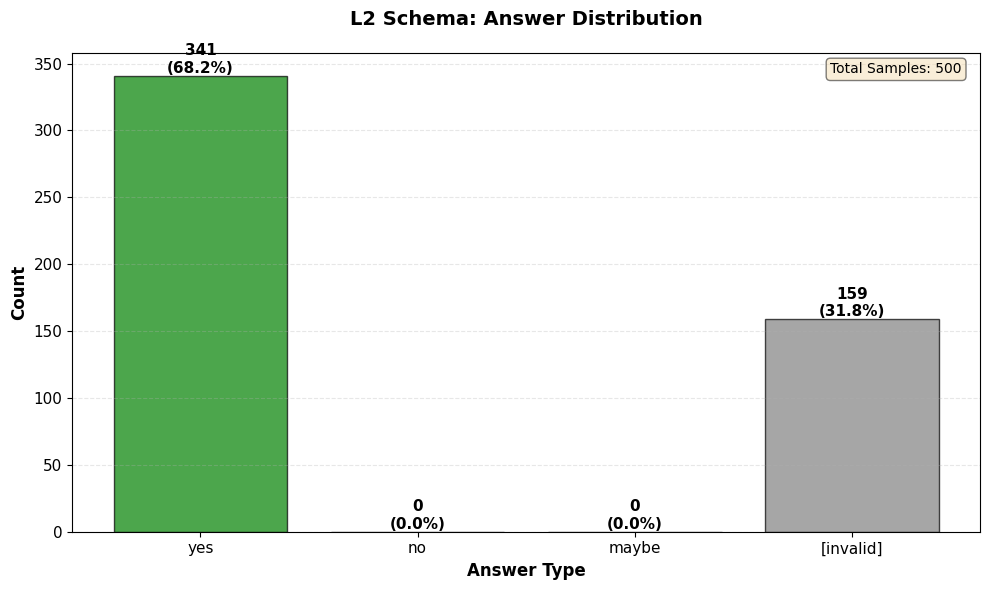

In [12]:
# 1) Answer Distribution
l2_answer_counts = Counter(l2_answers)
l2_categories = ['yes', 'no', 'maybe', '[invalid]']
l2_counts = [l2_answer_counts.get(cat, 0) for cat in l2_categories]

print("="*60)
print("1) ANSWER DISTRIBUTION (L2)")
print("="*60)
for cat, count in zip(l2_categories, l2_counts):
    print(f"  {cat}: {count} ({count/len(l2_answers)*100:.1f}%)")
print(f"\nTotal samples: {len(l2_answers)}")
print(f"Valid answers (yes+no+maybe): {sum(l2_counts[:3])} ({sum(l2_counts[:3])/len(l2_answers)*100:.1f}%)")
print(f"Invalid answers: {l2_counts[3]} ({l2_counts[3]/len(l2_answers)*100:.1f}%)")

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(l2_categories, l2_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')

for bar, count in zip(bars, l2_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(l2_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Answer Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('L2 Schema: Answer Distribution', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.text(0.98, 0.98, f'Total Samples: {len(l2_answers)}', 
         transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


2) CONFIDENCE SCORE STATISTICS (L2)
Valid confidence scores: 341 (68.2%)
Missing/Invalid confidence: 159

Descriptive Statistics:
  Mean: 0.9948
  Median: 1.0000
  Std Dev: 0.0309
  Min: 0.5000
  Max: 1.0000
  Range: 0.5000

Percentiles:
  25th: 1.0000
  50th: 1.0000
  75th: 1.0000
  90th: 1.0000
  95th: 1.0000

Confidence by Answer Type:
  yes: mean=0.9948, median=1.0000, count=341
  no: No valid confidence scores
  maybe: No valid confidence scores


/tmp/ipykernel_265282/4263084475.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(data_to_plot, labels=labels_to_plot)


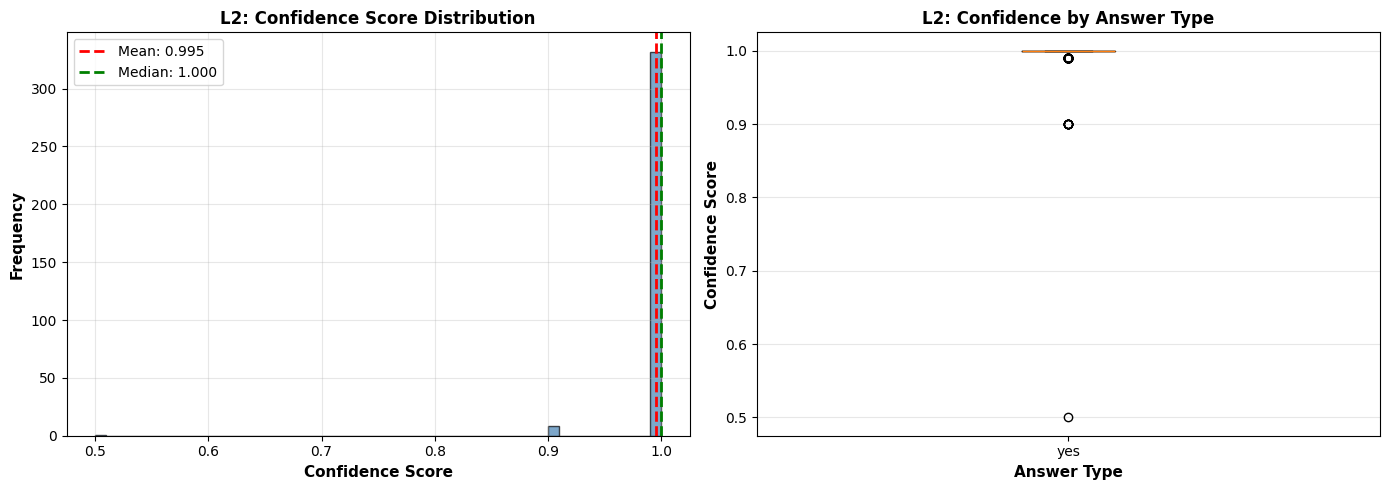

In [13]:
# 2) Confidence Score Statistics
valid_confidences = [c for c in l2_confidences if c is not None]

print("="*60)
print("2) CONFIDENCE SCORE STATISTICS (L2)")
print("="*60)

if valid_confidences:
    import numpy as np
    
    print(f"Valid confidence scores: {len(valid_confidences)} ({len(valid_confidences)/len(l2_answers)*100:.1f}%)")
    print(f"Missing/Invalid confidence: {len(l2_answers) - len(valid_confidences)}")
    print(f"\nDescriptive Statistics:")
    print(f"  Mean: {np.mean(valid_confidences):.4f}")
    print(f"  Median: {np.median(valid_confidences):.4f}")
    print(f"  Std Dev: {np.std(valid_confidences):.4f}")
    print(f"  Min: {np.min(valid_confidences):.4f}")
    print(f"  Max: {np.max(valid_confidences):.4f}")
    print(f"  Range: {np.max(valid_confidences) - np.min(valid_confidences):.4f}")
    print(f"\nPercentiles:")
    percentiles = [25, 50, 75, 90, 95]
    for p in percentiles:
        print(f"  {p}th: {np.percentile(valid_confidences, p):.4f}")
    
    # Confidence by answer type
    print(f"\nConfidence by Answer Type:")
    for answer_type in ['yes', 'no', 'maybe']:
        conf_by_type = [l2_confidences[i] for i, ans in enumerate(l2_answers) 
                       if ans == answer_type and l2_confidences[i] is not None]
        if conf_by_type:
            print(f"  {answer_type}: mean={np.mean(conf_by_type):.4f}, median={np.median(conf_by_type):.4f}, count={len(conf_by_type)}")
        else:
            print(f"  {answer_type}: No valid confidence scores")
    
    # Distribution histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    ax1.hist(valid_confidences, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax1.axvline(np.mean(valid_confidences), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(valid_confidences):.3f}')
    ax1.axvline(np.median(valid_confidences), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(valid_confidences):.3f}')
    ax1.set_xlabel('Confidence Score', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax1.set_title('L2: Confidence Score Distribution', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Box plot by answer type
    conf_by_answer = {}
    for answer_type in ['yes', 'no', 'maybe']:
        conf_by_answer[answer_type] = [l2_confidences[i] for i, ans in enumerate(l2_answers) 
                                      if ans == answer_type and l2_confidences[i] is not None]
    
    if any(conf_by_answer.values()):
        data_to_plot = [conf_by_answer[k] for k in ['yes', 'no', 'maybe'] if conf_by_answer[k]]
        labels_to_plot = [k for k in ['yes', 'no', 'maybe'] if conf_by_answer[k]]
        ax2.boxplot(data_to_plot, labels=labels_to_plot)
        ax2.set_ylabel('Confidence Score', fontsize=11, fontweight='bold')
        ax2.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
        ax2.set_title('L2: Confidence by Answer Type', fontsize=12, fontweight='bold')
        ax2.grid(alpha=0.3, axis='y')
    else:
        ax2.text(0.5, 0.5, 'No valid confidence scores\nby answer type', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('L2: Confidence by Answer Type', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No valid confidence scores found!")


3) SCHEMA COMPLIANCE STATISTICS (L2)
Total samples: 500

JSON Structure Compliance:
  Valid JSON structure: 341 (68.2%)
  Invalid/malformed JSON: 159 (31.8%)

Field Presence:
  Both fields present (answer + confidence): 341 (68.2%)
  Missing fields: 159 (31.8%)

Confidence Range Validation:
  Confidence in valid range [0.0, 1.0]: 341 (68.2%)
  Confidence out of range: 0 (0.0% of valid JSON)

Overall Schema Compliance:
  Fully compliant (valid JSON + both fields + confidence in range): 341 (68.2%)


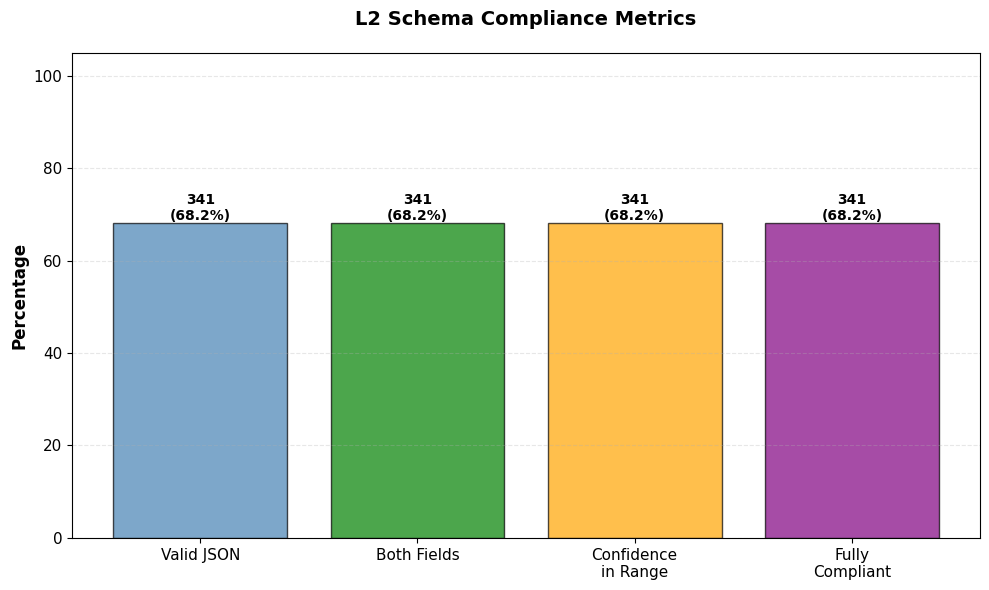

In [14]:
# 3) Schema Compliance Statistics
print("="*60)
print("3) SCHEMA COMPLIANCE STATISTICS (L2)")
print("="*60)

total = len(l2_answers)
valid_json_count = sum(l2_valid_json)
both_fields_count = sum(l2_both_fields)
confidence_in_range_count = sum(l2_confidence_in_range)

print(f"Total samples: {total}")
print(f"\nJSON Structure Compliance:")
print(f"  Valid JSON structure: {valid_json_count} ({valid_json_count/total*100:.1f}%)")
print(f"  Invalid/malformed JSON: {total - valid_json_count} ({(total-valid_json_count)/total*100:.1f}%)")

print(f"\nField Presence:")
print(f"  Both fields present (answer + confidence): {both_fields_count} ({both_fields_count/total*100:.1f}%)")
print(f"  Missing fields: {total - both_fields_count} ({(total-both_fields_count)/total*100:.1f}%)")

print(f"\nConfidence Range Validation:")
print(f"  Confidence in valid range [0.0, 1.0]: {confidence_in_range_count} ({confidence_in_range_count/total*100:.1f}%)")
if both_fields_count > 0:
    out_of_range = both_fields_count - confidence_in_range_count
    print(f"  Confidence out of range: {out_of_range} ({out_of_range/both_fields_count*100:.1f}% of valid JSON)")

print(f"\nOverall Schema Compliance:")
fully_compliant = sum(1 for i in range(total) 
                     if l2_valid_json[i] and l2_both_fields[i] and l2_confidence_in_range[i])
print(f"  Fully compliant (valid JSON + both fields + confidence in range): {fully_compliant} ({fully_compliant/total*100:.1f}%)")

# Visualize compliance
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Valid JSON', 'Both Fields', 'Confidence\nin Range', 'Fully\nCompliant']
counts = [valid_json_count, both_fields_count, confidence_in_range_count, fully_compliant]
percentages = [c/total*100 for c in counts]

bars = ax.bar(categories, percentages, color=['steelblue', 'green', 'orange', 'purple'], alpha=0.7, edgecolor='black')
for bar, count, pct in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Percentage', fontsize=12, fontweight='bold')
ax.set_title('L2 Schema Compliance Metrics', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


4) COMPARISON: L2 vs L1

Answer Distribution Comparison:
Category     L1 Count     L1 %       L2 Count     L2 %       Difference  
----------------------------------------------------------------------
yes          341          68.2       341          68.2                 +0
no           0            0.0        0            0.0                  +0
maybe        0            0.0        0            0.0                  +0
[invalid]    159          31.8       159          31.8                 +0

Validity Comparison:
  L1 Valid answers: 341 (68.2%)
  L2 Valid answers: 341 (68.2%)
  Difference: +0 (+0.0%)

  L1 Invalid answers: 159 (31.8%)
  L2 Invalid answers: 159 (31.8%)
  Difference: +0 (+0.0%)


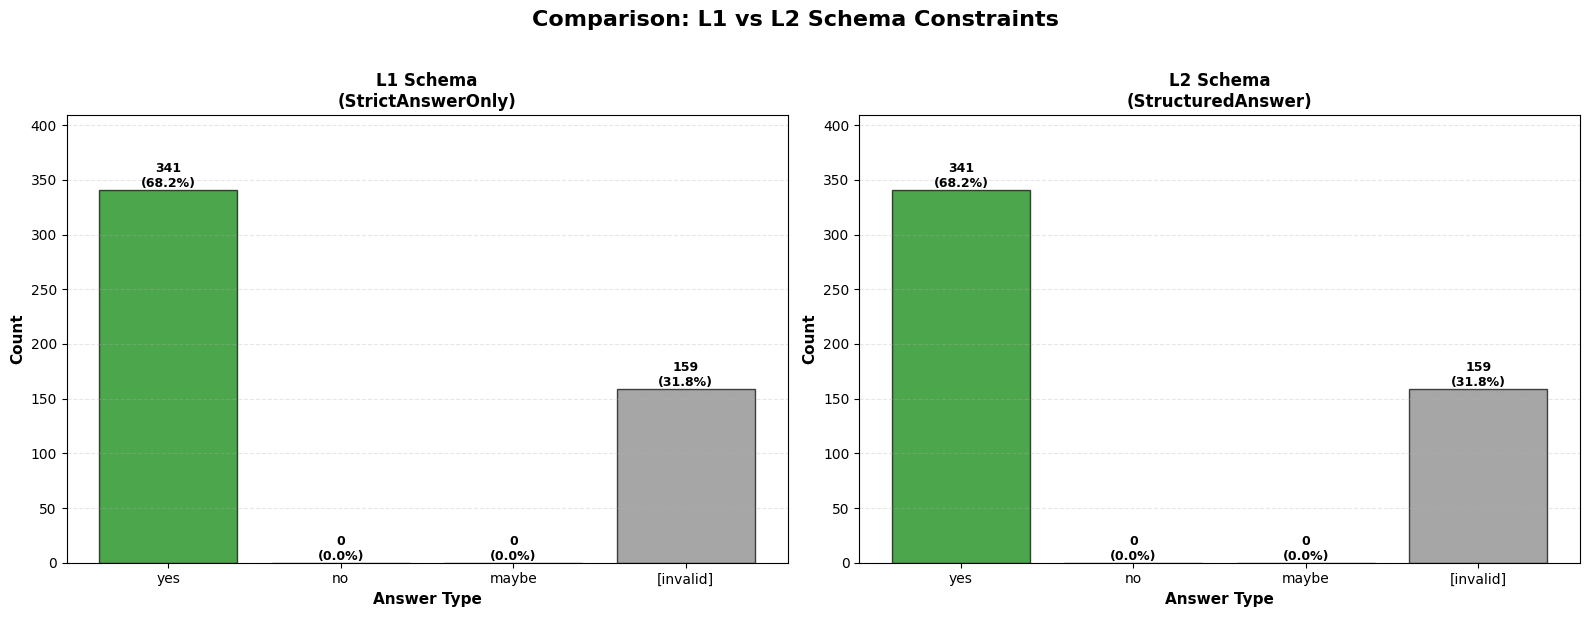


SUMMARY
L1 adds: Enum constraint only (yes/no/maybe)
L2 adds: Enum constraint + numeric field (confidence: 0.0-1.0)

Impact of adding confidence field:
  Validity change: +0.0%
  Invalid responses change: +0.0%


In [15]:
# 4) Comparison with L1
print("="*60)
print("4) COMPARISON: L2 vs L1")
print("="*60)

# Answer distribution comparison
l1_answer_counts = Counter(answers)
l1_counts = [l1_answer_counts.get(cat, 0) for cat in l2_categories]

print("\nAnswer Distribution Comparison:")
print(f"{'Category':<12} {'L1 Count':<12} {'L1 %':<10} {'L2 Count':<12} {'L2 %':<10} {'Difference':<12}")
print("-" * 70)
for cat, l1_c, l2_c in zip(l2_categories, l1_counts, l2_counts):
    l1_pct = l1_c/len(answers)*100 if len(answers) > 0 else 0
    l2_pct = l2_c/len(l2_answers)*100 if len(l2_answers) > 0 else 0
    diff = l2_c - l1_c
    print(f"{cat:<12} {l1_c:<12} {l1_pct:<10.1f} {l2_c:<12} {l2_pct:<10.1f} {diff:>+12}")

l1_valid = sum(l1_counts[:3])
l2_valid = sum(l2_counts[:3])
l1_invalid = l1_counts[3]
l2_invalid = l2_counts[3]

print(f"\nValidity Comparison:")
print(f"  L1 Valid answers: {l1_valid} ({l1_valid/len(answers)*100:.1f}%)")
print(f"  L2 Valid answers: {l2_valid} ({l2_valid/len(l2_answers)*100:.1f}%)")
print(f"  Difference: {l2_valid - l1_valid:+.0f} ({(l2_valid/len(l2_answers)*100) - (l1_valid/len(answers)*100):+.1f}%)")

print(f"\n  L1 Invalid answers: {l1_invalid} ({l1_invalid/len(answers)*100:.1f}%)")
print(f"  L2 Invalid answers: {l2_invalid} ({l2_invalid/len(l2_answers)*100:.1f}%)")
print(f"  Difference: {l2_invalid - l1_invalid:+.0f} ({(l2_invalid/len(l2_answers)*100) - (l1_invalid/len(answers)*100):+.1f}%)")

# Side-by-side comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

max_count = max(max(l1_counts), max(l2_counts))

# L1 results
bars1 = ax1.bar(l2_categories, l1_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars1, l1_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax1.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax1.set_ylabel('Count', fontsize=11, fontweight='bold')
ax1.set_title('L1 Schema\n(StrictAnswerOnly)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim([0, max_count * 1.2])

# L2 results
bars2 = ax2.bar(l2_categories, l2_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars2, l2_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(l2_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax2.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax2.set_ylabel('Count', fontsize=11, fontweight='bold')
ax2.set_title('L2 Schema\n(StructuredAnswer)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim([0, max_count * 1.2])

plt.suptitle('Comparison: L1 vs L2 Schema Constraints', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"L1 adds: Enum constraint only (yes/no/maybe)")
print(f"L2 adds: Enum constraint + numeric field (confidence: 0.0-1.0)")
print(f"\nImpact of adding confidence field:")
print(f"  Validity change: {(l2_valid/len(l2_answers)*100) - (l1_valid/len(answers)*100):+.1f}%")
print(f"  Invalid responses change: {(l2_invalid/len(l2_answers)*100) - (l1_invalid/len(answers)*100):+.1f}%")
print("="*60)


**PubMedQA – Analysis of Schema Level 2 (AnswerWithConfidence)**

**1. Overview**
Schema Level 2 adds a single field (`confidence`) on top of the strict `answer` enum from Level 1.  
The surprising result: **L2 behaves identically to L1 in terms of answer distribution**, but provides additional information (confidence scores) that expose how the model internally behaves under schema constraints.

---

**2. L1 vs L2 Answer Distribution**

The bar charts show:

**L1 Schema (StrictAnswerOnly)**
- **341 “yes” answers (68.2%)**  
- **0 “no”, 0 “maybe”**  
- **159 invalid (31.8%)**

**L2 Schema (AnswerWithConfidence)**
- **341 “yes” answers (68.2%)**  
- **0 “no”, 0 “maybe”**  
- **159 invalid (31.8%)**

**➡️ L2 produces the *same* answer distribution as L1.**  
The added confidence field has *no effect* on the model’s coarse decision-making.

---

**3. Schema Compliance for L2**

All valid answers (341) satisfy:
- Valid JSON  
- Both fields present (`answer`, `confidence`)  
- Confidence ∈ [0, 1]  
- Fully schema-compliant  

**Compliance rate: 68.2%**  
(same as the proportion of valid L1 JSON outputs)

➡️ The confidence field does **not** increase schema failures.

---

**4. Confidence Score Behavior**

**A. Distribution**
- **Mean confidence: ~0.995**  
- **Median confidence: 1.000**  
- Most values are **exactly 1.0**  
- A small tail around 0.9  
- A single outlier at ~0.5

**Interpretation:**  
The model reports **maximum confidence almost universally**, despite the clear presence of uncertainty and even schema invalid outputs.

This indicates:
- **Severe overconfidence**  
- **No calibration**  
- Confidence field is **not meaningful** at this level

---

**B. Confidence by Answer Type**
Since **all valid answers are "yes"**, the confidence plot shows:
- 341 points at or near **1.0**
- No variation by class
- No examples for “no” or “maybe”

**Interpretation:**  
The model collapses to:
- **single-label behavior ("yes")**
- **uniform high confidence**

This is classic **mode collapse** combined with **overconfidence**.

---

**5. Key Takeaways**

**1. L2 does NOT change the model’s predictions**
The answer distribution is **identical** to L1:
- Still 68% “yes”  
- Still 32% invalid  
- Still 0% “no”, 0% “maybe”

**2. The model becomes extremely overconfident**
- Confidence ≈ 1.0 on nearly every valid output  
- No calibration  
- No correlation with correctness or parsing success

**3. L2 confirms the L1 phenomenon**
Schema constraints force the model into a **majority-class strategy**, not improved reasoning.

**4. Confidence at L2 is not informative**
It reflects:
- Schema compliance  
- But not semantic uncertainty  
- And certainly not probabilistic reasoning

---

**6. What This Means for Next Levels (L3–L6)**

These L2 results strongly suggest that:
- **Adding fields that do not add semantic load** (like a single confidence number)  
  → does **not** change behavior  
- **Richer schemas requiring reasoning or evidence** (L3–L5)  
  → are necessary to break the “always yes + max confidence” mode collapse

This sets the stage for a meaningful comparison when moving on to:
- Required reasoning (L3, L4)  
- Evidence grounding (L5)  
- Flexible schemas (L6)

---


## Level 3


In [16]:
# Load L3 samples and extract data
l3_samples_file = "samples_pubmedqa_generation_L3.jsonl"

l3_answers = []
l3_reasonings = []
l3_reasoning_lengths = []
l3_valid_json = []
l3_both_fields = []
l3_reasoning_in_range = []
l3_errors = []  # Track error types

with open(l3_samples_file, 'r') as f:
    for line in f:
        sample = json.loads(line)
        
        # Get raw response (first element of first list)
        raw_resp = sample.get('resps', [[None]])[0][0] if sample.get('resps') else None
        filtered_resp = sample.get('filtered_resps', ['[invalid]'])[0]
        
        # Try to parse JSON from raw response
        json_valid = False
        answer = None
        reasoning = None
        reasoning_length = None
        error_type = None
        
        if raw_resp and isinstance(raw_resp, str):
            try:
                parsed = json.loads(raw_resp.strip())
                if isinstance(parsed, dict):
                    json_valid = True
                    answer = parsed.get('answer', '').lower().strip() if parsed.get('answer') else None
                    reasoning_val = parsed.get('reasoning')
                    if reasoning_val is not None:
                        reasoning = str(reasoning_val)
                        reasoning_length = len(reasoning)
            except (json.JSONDecodeError, AttributeError) as e:
                error_type = 'invalid_json'
        
        # Track schema compliance
        l3_valid_json.append(json_valid)
        has_both = json_valid and answer is not None and reasoning is not None
        l3_both_fields.append(has_both)
        
        # Check reasoning length constraints (10-200 characters)
        if has_both:
            if reasoning_length < 10:
                error_type = 'reasoning_too_short'
                l3_reasoning_in_range.append(False)
            elif reasoning_length > 200:
                error_type = 'reasoning_too_long'
                l3_reasoning_in_range.append(False)
            else:
                l3_reasoning_in_range.append(True)
        else:
            if not json_valid:
                error_type = error_type or 'invalid_json'
            elif answer is None:
                error_type = 'missing_answer'
            elif reasoning is None:
                error_type = 'missing_reasoning'
            l3_reasoning_in_range.append(False)
        
        # Extract answer (use filtered_resp if JSON parsing failed)
        if answer and answer in ['yes', 'no', 'maybe']:
            l3_answers.append(answer)
        else:
            # Fall back to filtered_resp
            answer_normalized = filtered_resp.lower().strip() if filtered_resp else '[invalid]'
            if answer_normalized in ['yes', 'no', 'maybe']:
                l3_answers.append(answer_normalized)
            else:
                l3_answers.append('[invalid]')
        
        # Store reasoning and length (None if invalid)
        if l3_reasoning_in_range[-1]:
            l3_reasonings.append(reasoning)
            l3_reasoning_lengths.append(reasoning_length)
        else:
            l3_reasonings.append(None)
            l3_reasoning_lengths.append(None)
        
        # Track error type
        if not l3_reasoning_in_range[-1] and error_type is None:
            error_type = 'unknown'
        l3_errors.append(error_type)

print(f"Loaded {len(l3_answers)} samples from L3")
print(f"Valid JSON: {sum(l3_valid_json)} ({sum(l3_valid_json)/len(l3_answers)*100:.1f}%)")
print(f"Both fields present: {sum(l3_both_fields)} ({sum(l3_both_fields)/len(l3_answers)*100:.1f}%)")
print(f"Reasoning in range [10, 200]: {sum(l3_reasoning_in_range)} ({sum(l3_reasoning_in_range)/len(l3_answers)*100:.1f}%)")


Loaded 500 samples from L3
Valid JSON: 315 (63.0%)
Both fields present: 315 (63.0%)
Reasoning in range [10, 200]: 315 (63.0%)


1) ANSWER DISTRIBUTION (L3)
  yes: 341 (68.2%)
  no: 0 (0.0%)
  maybe: 0 (0.0%)
  [invalid]: 159 (31.8%)

Total samples: 500
Valid answers (yes+no+maybe): 341 (68.2%)
Invalid answers: 159 (31.8%)


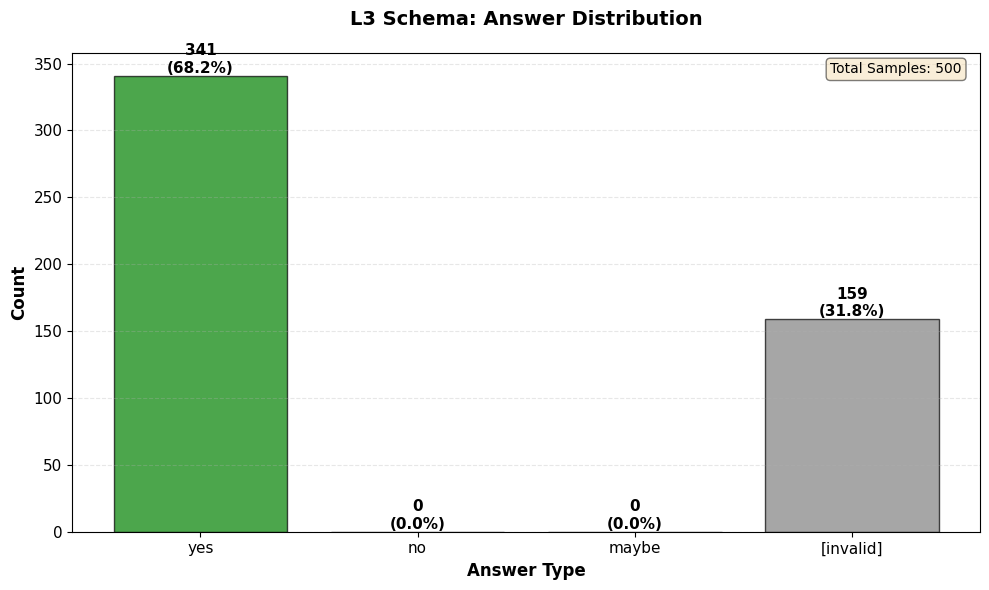

In [17]:
# 1) Answer Distribution
l3_answer_counts = Counter(l3_answers)
l3_categories = ['yes', 'no', 'maybe', '[invalid]']
l3_counts = [l3_answer_counts.get(cat, 0) for cat in l3_categories]

print("="*60)
print("1) ANSWER DISTRIBUTION (L3)")
print("="*60)
for cat, count in zip(l3_categories, l3_counts):
    print(f"  {cat}: {count} ({count/len(l3_answers)*100:.1f}%)")
print(f"\nTotal samples: {len(l3_answers)}")
print(f"Valid answers (yes+no+maybe): {sum(l3_counts[:3])} ({sum(l3_counts[:3])/len(l3_answers)*100:.1f}%)")
print(f"Invalid answers: {l3_counts[3]} ({l3_counts[3]/len(l3_answers)*100:.1f}%)")

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(l3_categories, l3_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')

for bar, count in zip(bars, l3_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(l3_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Answer Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('L3 Schema: Answer Distribution', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.text(0.98, 0.98, f'Total Samples: {len(l3_answers)}', 
         transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


2) REASONING FIELD STATISTICS (L3)
Valid reasoning fields: 315 (63.0%)
Missing/Invalid reasoning: 185

Reasoning Length Statistics (characters):
  Mean: 198.67
  Median: 200.00
  Std Dev: 10.85
  Min: 75
  Max: 200
  Range: 125

Percentiles:
  25th: 200.00
  50th: 200.00
  75th: 200.00
  90th: 200.00
  95th: 200.00

Length Compliance:
  In valid range [10, 200]: 315 (63.0%)
  Too short (<10 chars): 0 (0.0%)
  Too long (>200 chars): 0 (0.0%)

Reasoning Length by Answer Type:
  yes: mean=198.67, median=200.00, count=315
  no: No valid reasoning lengths
  maybe: No valid reasoning lengths

Word Count Statistics:
  Mean: 31.26 words
  Median: 31.00 words
  Min: 12 words
  Max: 45 words


/tmp/ipykernel_265282/3132100208.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(data_to_plot, labels=labels_to_plot)


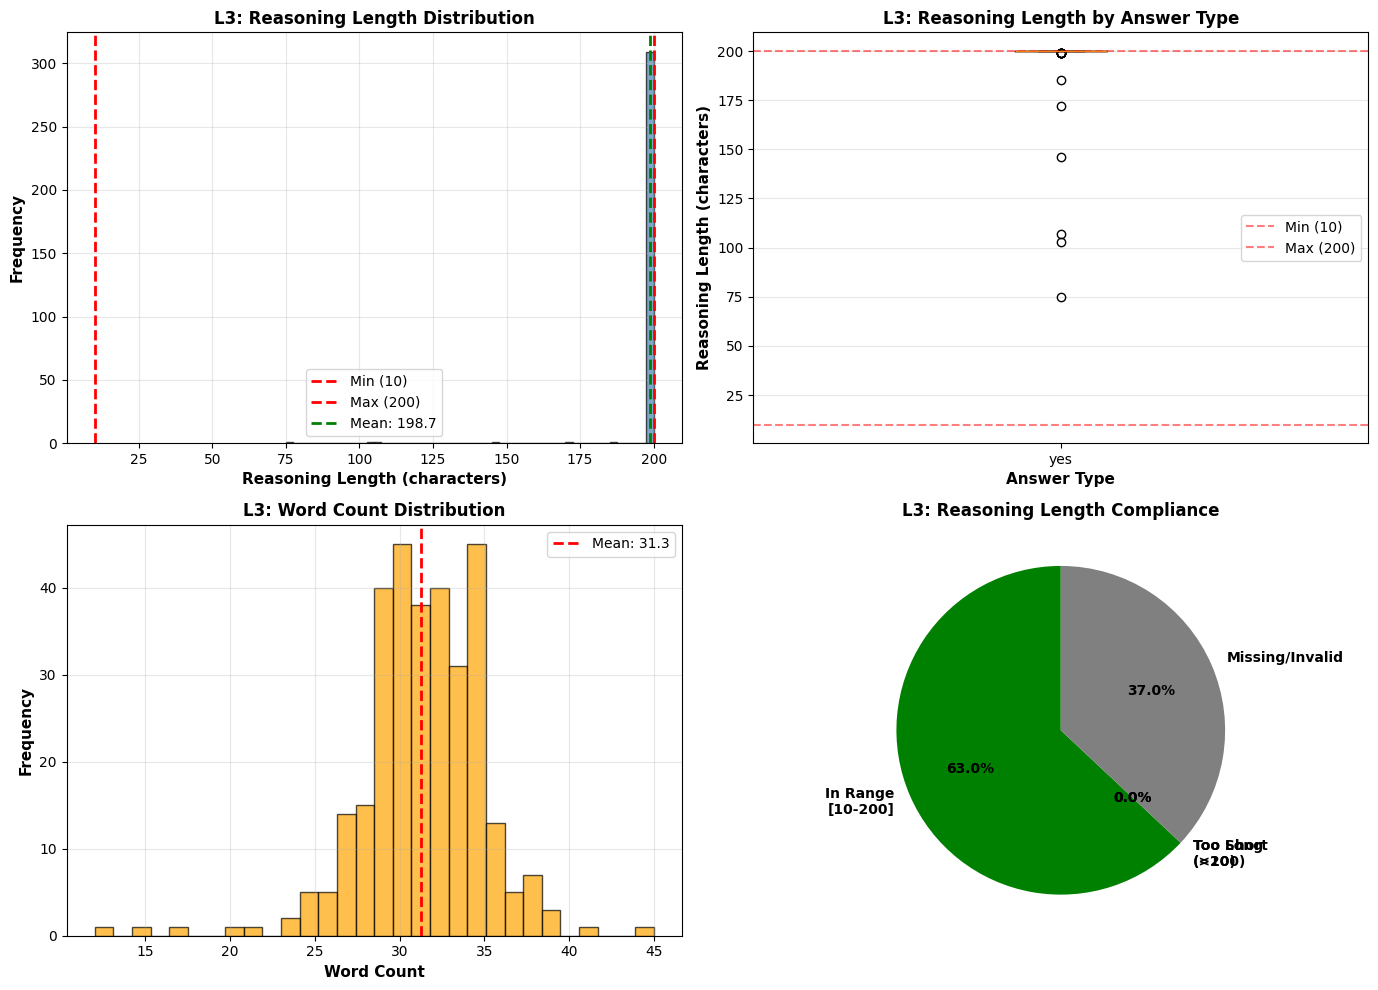

In [18]:
# 2) Reasoning Field Statistics
valid_reasonings = [r for r in l3_reasonings if r is not None]
valid_reasoning_lengths = [l for l in l3_reasoning_lengths if l is not None]

print("="*60)
print("2) REASONING FIELD STATISTICS (L3)")
print("="*60)

if valid_reasoning_lengths:
    import numpy as np
    
    print(f"Valid reasoning fields: {len(valid_reasoning_lengths)} ({len(valid_reasoning_lengths)/len(l3_answers)*100:.1f}%)")
    print(f"Missing/Invalid reasoning: {len(l3_answers) - len(valid_reasoning_lengths)}")
    print(f"\nReasoning Length Statistics (characters):")
    print(f"  Mean: {np.mean(valid_reasoning_lengths):.2f}")
    print(f"  Median: {np.median(valid_reasoning_lengths):.2f}")
    print(f"  Std Dev: {np.std(valid_reasoning_lengths):.2f}")
    print(f"  Min: {np.min(valid_reasoning_lengths):.0f}")
    print(f"  Max: {np.max(valid_reasoning_lengths):.0f}")
    print(f"  Range: {np.max(valid_reasoning_lengths) - np.min(valid_reasoning_lengths):.0f}")
    print(f"\nPercentiles:")
    percentiles = [25, 50, 75, 90, 95]
    for p in percentiles:
        print(f"  {p}th: {np.percentile(valid_reasoning_lengths, p):.2f}")
    
    # Length compliance
    too_short = sum(1 for l in l3_reasoning_lengths if l is not None and l < 10)
    too_long = sum(1 for l in l3_reasoning_lengths if l is not None and l > 200)
    in_range = sum(l3_reasoning_in_range)
    
    print(f"\nLength Compliance:")
    print(f"  In valid range [10, 200]: {in_range} ({in_range/len(l3_answers)*100:.1f}%)")
    print(f"  Too short (<10 chars): {too_short} ({too_short/len(l3_answers)*100:.1f}%)")
    print(f"  Too long (>200 chars): {too_long} ({too_long/len(l3_answers)*100:.1f}%)")
    
    # Reasoning length by answer type
    print(f"\nReasoning Length by Answer Type:")
    for answer_type in ['yes', 'no', 'maybe']:
        lengths_by_type = [l3_reasoning_lengths[i] for i, ans in enumerate(l3_answers) 
                           if ans == answer_type and l3_reasoning_lengths[i] is not None]
        if lengths_by_type:
            print(f"  {answer_type}: mean={np.mean(lengths_by_type):.2f}, median={np.median(lengths_by_type):.2f}, count={len(lengths_by_type)}")
        else:
            print(f"  {answer_type}: No valid reasoning lengths")
    
    # Word count statistics
    word_counts = []
    for reasoning in valid_reasonings:
        if reasoning:
            word_counts.append(len(reasoning.split()))
    
    if word_counts:
        print(f"\nWord Count Statistics:")
        print(f"  Mean: {np.mean(word_counts):.2f} words")
        print(f"  Median: {np.median(word_counts):.2f} words")
        print(f"  Min: {np.min(word_counts):.0f} words")
        print(f"  Max: {np.max(word_counts):.0f} words")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram of reasoning lengths
    axes[0, 0].hist(valid_reasoning_lengths, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].axvline(10, color='red', linestyle='--', linewidth=2, label='Min (10)')
    axes[0, 0].axvline(200, color='red', linestyle='--', linewidth=2, label='Max (200)')
    axes[0, 0].axvline(np.mean(valid_reasoning_lengths), color='green', linestyle='--', linewidth=2, label=f'Mean: {np.mean(valid_reasoning_lengths):.1f}')
    axes[0, 0].set_xlabel('Reasoning Length (characters)', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('L3: Reasoning Length Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Box plot by answer type
    lengths_by_answer = {}
    for answer_type in ['yes', 'no', 'maybe']:
        lengths_by_answer[answer_type] = [l3_reasoning_lengths[i] for i, ans in enumerate(l3_answers) 
                                          if ans == answer_type and l3_reasoning_lengths[i] is not None]
    
    if any(lengths_by_answer.values()):
        data_to_plot = [lengths_by_answer[k] for k in ['yes', 'no', 'maybe'] if lengths_by_answer[k]]
        labels_to_plot = [k for k in ['yes', 'no', 'maybe'] if lengths_by_answer[k]]
        axes[0, 1].boxplot(data_to_plot, labels=labels_to_plot)
        axes[0, 1].axhline(10, color='red', linestyle='--', alpha=0.5, label='Min (10)')
        axes[0, 1].axhline(200, color='red', linestyle='--', alpha=0.5, label='Max (200)')
        axes[0, 1].set_ylabel('Reasoning Length (characters)', fontsize=11, fontweight='bold')
        axes[0, 1].set_xlabel('Answer Type', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('L3: Reasoning Length by Answer Type', fontsize=12, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3, axis='y')
    else:
        axes[0, 1].text(0.5, 0.5, 'No valid reasoning lengths\nby answer type', 
                        ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12)
        axes[0, 1].set_title('L3: Reasoning Length by Answer Type', fontsize=12, fontweight='bold')
    
    # Word count histogram
    if word_counts:
        axes[1, 0].hist(word_counts, bins=30, edgecolor='black', alpha=0.7, color='orange')
        axes[1, 0].axvline(np.mean(word_counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(word_counts):.1f}')
        axes[1, 0].set_xlabel('Word Count', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('L3: Word Count Distribution', fontsize=12, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
    
    # Length compliance pie chart
    compliance_counts = [in_range, too_short, too_long, len(l3_answers) - len(valid_reasoning_lengths)]
    compliance_labels = ['In Range\n[10-200]', 'Too Short\n(<10)', 'Too Long\n(>200)', 'Missing/Invalid']
    colors = ['green', 'orange', 'red', 'gray']
    axes[1, 1].pie(compliance_counts, labels=compliance_labels, autopct='%1.1f%%', 
                   colors=colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
    axes[1, 1].set_title('L3: Reasoning Length Compliance', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No valid reasoning fields found!")


3) SCHEMA COMPLIANCE STATISTICS (L3)
Total samples: 500

JSON Structure Compliance:
  Valid JSON structure: 315 (63.0%)
  Invalid/malformed JSON: 185 (37.0%)

Field Presence:
  Both fields present (answer + reasoning): 315 (63.0%)
  Missing fields: 185 (37.0%)

Reasoning Length Validation:
  Reasoning in valid range [10, 200]: 315 (63.0%)
  Reasoning too short (<10): 0 (0.0% of valid JSON)
  Reasoning too long (>200): 0 (0.0% of valid JSON)

Overall Schema Compliance:
  Fully compliant (valid JSON + both fields + reasoning in range): 315 (63.0%)


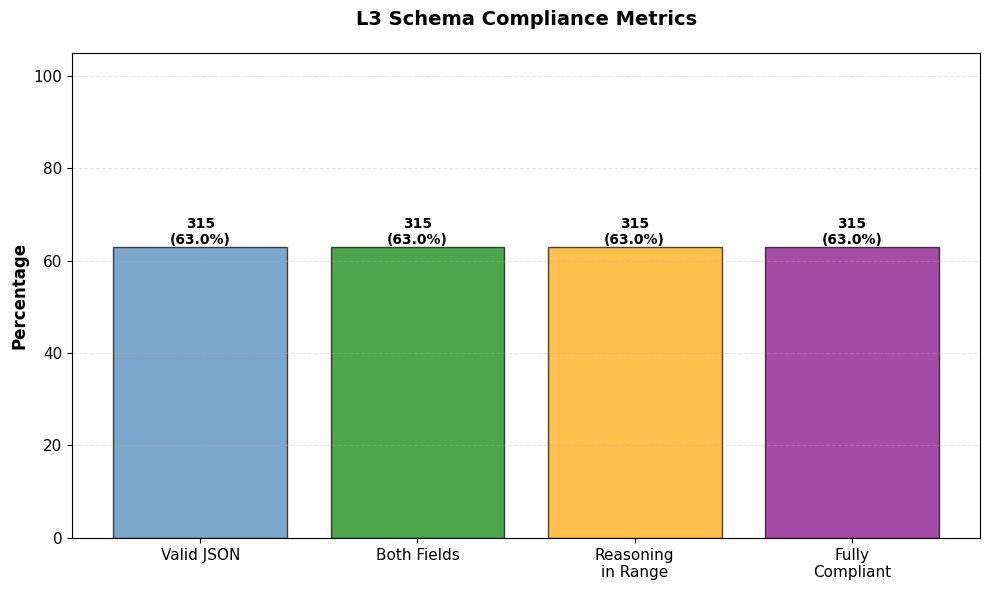

In [19]:
# 3) Schema Compliance Statistics
print("="*60)
print("3) SCHEMA COMPLIANCE STATISTICS (L3)")
print("="*60)

total = len(l3_answers)
valid_json_count = sum(l3_valid_json)
both_fields_count = sum(l3_both_fields)
reasoning_in_range_count = sum(l3_reasoning_in_range)

print(f"Total samples: {total}")
print(f"\nJSON Structure Compliance:")
print(f"  Valid JSON structure: {valid_json_count} ({valid_json_count/total*100:.1f}%)")
print(f"  Invalid/malformed JSON: {total - valid_json_count} ({(total-valid_json_count)/total*100:.1f}%)")

print(f"\nField Presence:")
print(f"  Both fields present (answer + reasoning): {both_fields_count} ({both_fields_count/total*100:.1f}%)")
print(f"  Missing fields: {total - both_fields_count} ({(total-both_fields_count)/total*100:.1f}%)")

print(f"\nReasoning Length Validation:")
print(f"  Reasoning in valid range [10, 200]: {reasoning_in_range_count} ({reasoning_in_range_count/total*100:.1f}%)")
if both_fields_count > 0:
    too_short_count = sum(1 for l in l3_reasoning_lengths if l is not None and l < 10)
    too_long_count = sum(1 for l in l3_reasoning_lengths if l is not None and l > 200)
    print(f"  Reasoning too short (<10): {too_short_count} ({too_short_count/both_fields_count*100:.1f}% of valid JSON)")
    print(f"  Reasoning too long (>200): {too_long_count} ({too_long_count/both_fields_count*100:.1f}% of valid JSON)")

print(f"\nOverall Schema Compliance:")
fully_compliant = sum(1 for i in range(total) 
                     if l3_valid_json[i] and l3_both_fields[i] and l3_reasoning_in_range[i])
print(f"  Fully compliant (valid JSON + both fields + reasoning in range): {fully_compliant} ({fully_compliant/total*100:.1f}%)")

# Visualize compliance
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Valid JSON', 'Both Fields', 'Reasoning\nin Range', 'Fully\nCompliant']
counts = [valid_json_count, both_fields_count, reasoning_in_range_count, fully_compliant]
percentages = [c/total*100 for c in counts]

bars = ax.bar(categories, percentages, color=['steelblue', 'green', 'orange', 'purple'], alpha=0.7, edgecolor='black')
for bar, count, pct in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Percentage', fontsize=12, fontweight='bold')
ax.set_title('L3 Schema Compliance Metrics', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


4) COMPARISON ACROSS SCHEMA LEVELS (L1, L2, L3)

Answer Distribution Comparison:
Category     L1 Count     L1 %       L2 Count     L2 %       L3 Count     L3 %      
--------------------------------------------------------------------------------
yes          341          68.2       341          68.2       341          68.2      
no           0            0.0        0            0.0        0            0.0       
maybe        0            0.0        0            0.0        0            0.0       
[invalid]    159          31.8       159          31.8       159          31.8      

Validity Comparison:
  L1 Valid: 341 (68.2%)
  L2 Valid: 341 (68.2%)
  L3 Valid: 341 (68.2%)

  L1 Invalid: 159 (31.8%)
  L2 Invalid: 159 (31.8%)
  L3 Invalid: 159 (31.8%)

Schema Compliance Comparison:
  L1: Enum constraint only (no compliance metric)
  L2 Fully Compliant: 341 (68.2%)
  L3 Fully Compliant: 315 (63.0%)


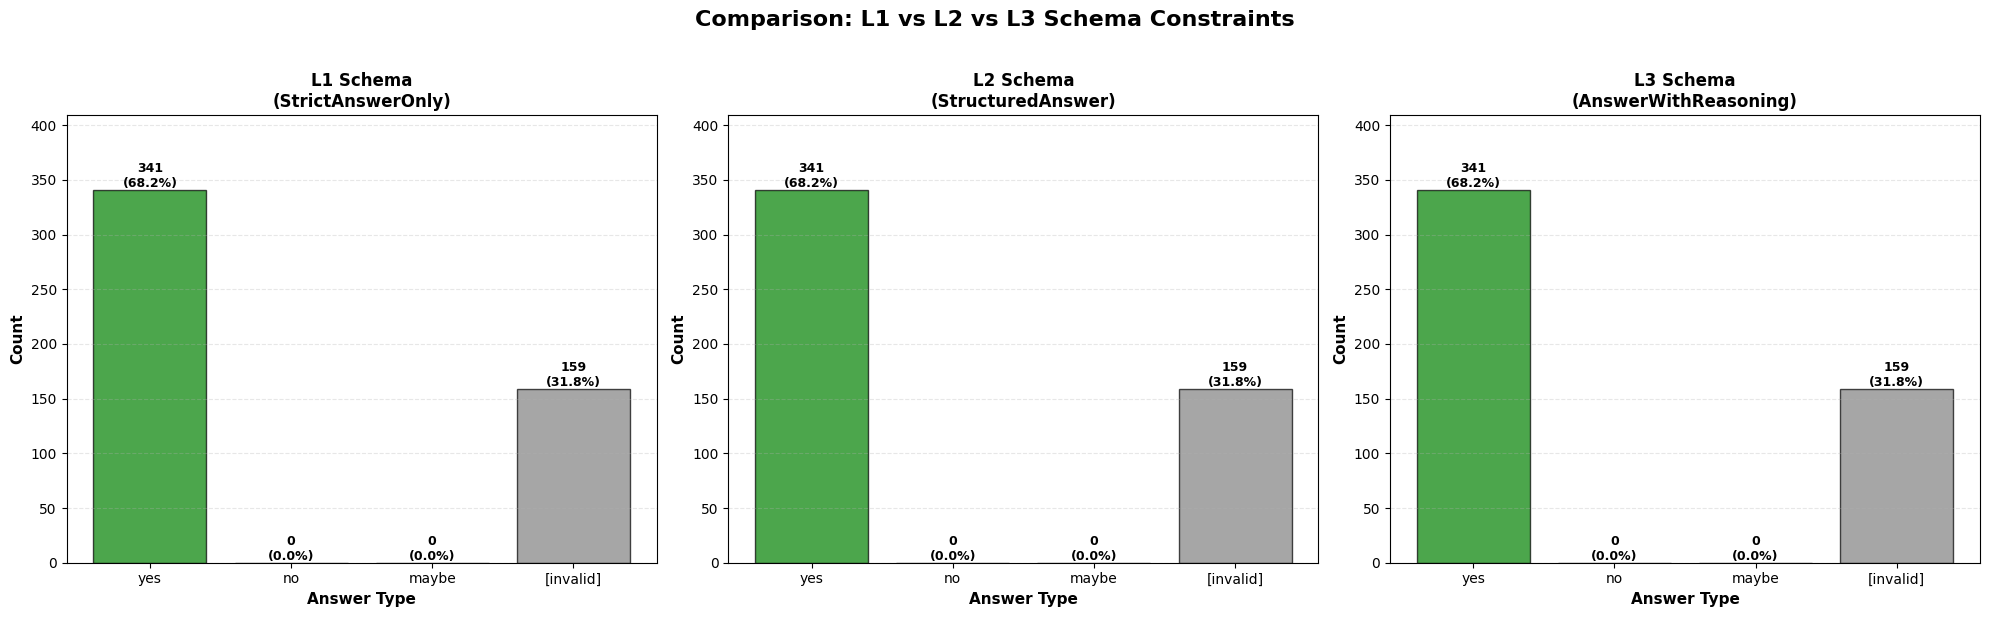


SCHEMA COMPLEXITY PROGRESSION
L1: Enum constraint only (yes/no/maybe)
L2: Enum + numeric field (confidence: 0.0-1.0)
L3: Enum + text field (reasoning: 10-200 chars)

Impact of adding constraints:
  L1→L2 validity change: +0.0%
  L2→L3 validity change: +0.0%
  L1→L3 validity change: +0.0%


In [20]:
# 4) Comparison Across Schema Levels (L1, L2, L3)
print("="*60)
print("4) COMPARISON ACROSS SCHEMA LEVELS (L1, L2, L3)")
print("="*60)

# Ensure we have L1 and L2 data loaded
# L1 data should be in 'answers' variable, L2 in 'l2_answers'
# If not loaded, we need to load them

# Answer distribution comparison
l1_answer_counts = Counter(answers)
l1_counts = [l1_answer_counts.get(cat, 0) for cat in l3_categories]

# L2 counts (should already be computed)
# l2_counts should exist from L2 analysis

print("\nAnswer Distribution Comparison:")
print(f"{'Category':<12} {'L1 Count':<12} {'L1 %':<10} {'L2 Count':<12} {'L2 %':<10} {'L3 Count':<12} {'L3 %':<10}")
print("-" * 80)
for cat, l1_c, l2_c, l3_c in zip(l3_categories, l1_counts, l2_counts, l3_counts):
    l1_pct = l1_c/len(answers)*100 if len(answers) > 0 else 0
    l2_pct = l2_c/len(l2_answers)*100 if len(l2_answers) > 0 else 0
    l3_pct = l3_c/len(l3_answers)*100 if len(l3_answers) > 0 else 0
    print(f"{cat:<12} {l1_c:<12} {l1_pct:<10.1f} {l2_c:<12} {l2_pct:<10.1f} {l3_c:<12} {l3_pct:<10.1f}")

l1_valid = sum(l1_counts[:3])
l2_valid = sum(l2_counts[:3])
l3_valid = sum(l3_counts[:3])
l1_invalid = l1_counts[3]
l2_invalid = l2_counts[3]
l3_invalid = l3_counts[3]

print(f"\nValidity Comparison:")
print(f"  L1 Valid: {l1_valid} ({l1_valid/len(answers)*100:.1f}%)")
print(f"  L2 Valid: {l2_valid} ({l2_valid/len(l2_answers)*100:.1f}%)")
print(f"  L3 Valid: {l3_valid} ({l3_valid/len(l3_answers)*100:.1f}%)")
print(f"\n  L1 Invalid: {l1_invalid} ({l1_invalid/len(answers)*100:.1f}%)")
print(f"  L2 Invalid: {l2_invalid} ({l2_invalid/len(l2_answers)*100:.1f}%)")
print(f"  L3 Invalid: {l3_invalid} ({l3_invalid/len(l3_answers)*100:.1f}%)")

# Schema compliance comparison
l2_fully_compliant = sum(1 for i in range(len(l2_answers)) 
                        if l2_valid_json[i] and l2_both_fields[i] and l2_confidence_in_range[i])
l3_fully_compliant = fully_compliant

print(f"\nSchema Compliance Comparison:")
print(f"  L1: Enum constraint only (no compliance metric)")
print(f"  L2 Fully Compliant: {l2_fully_compliant} ({l2_fully_compliant/len(l2_answers)*100:.1f}%)")
print(f"  L3 Fully Compliant: {l3_fully_compliant} ({l3_fully_compliant/len(l3_answers)*100:.1f}%)")

# Side-by-side comparison chart
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

max_count = max(max(l1_counts), max(l2_counts), max(l3_counts))

# L1 results
bars1 = ax1.bar(l3_categories, l1_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars1, l1_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax1.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax1.set_ylabel('Count', fontsize=11, fontweight='bold')
ax1.set_title('L1 Schema\n(StrictAnswerOnly)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim([0, max_count * 1.2])

# L2 results
bars2 = ax2.bar(l3_categories, l2_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars2, l2_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(l2_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax2.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax2.set_ylabel('Count', fontsize=11, fontweight='bold')
ax2.set_title('L2 Schema\n(StructuredAnswer)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim([0, max_count * 1.2])

# L3 results
bars3 = ax3.bar(l3_categories, l3_counts, color=['green', 'red', 'orange', 'gray'], alpha=0.7, edgecolor='black')
for bar, count in zip(bars3, l3_counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(l3_answers)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
ax3.set_xlabel('Answer Type', fontsize=11, fontweight='bold')
ax3.set_ylabel('Count', fontsize=11, fontweight='bold')
ax3.set_title('L3 Schema\n(AnswerWithReasoning)', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3, linestyle='--')
ax3.set_ylim([0, max_count * 1.2])

plt.suptitle('Comparison: L1 vs L2 vs L3 Schema Constraints', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("SCHEMA COMPLEXITY PROGRESSION")
print("="*60)
print(f"L1: Enum constraint only (yes/no/maybe)")
print(f"L2: Enum + numeric field (confidence: 0.0-1.0)")
print(f"L3: Enum + text field (reasoning: 10-200 chars)")
print(f"\nImpact of adding constraints:")
print(f"  L1→L2 validity change: {(l2_valid/len(l2_answers)*100) - (l1_valid/len(answers)*100):+.1f}%")
print(f"  L2→L3 validity change: {(l3_valid/len(l3_answers)*100) - (l2_valid/len(l2_answers)*100):+.1f}%")
print(f"  L1→L3 validity change: {(l3_valid/len(l3_answers)*100) - (l1_valid/len(answers)*100):+.1f}%")
print("="*60)


5) ERROR ANALYSIS (L3)
Total samples: 500
Samples with errors: 185 (37.0%)

Error Type Distribution:
  No Error (Fully Compliant): 315 (63.0%)
  Invalid/Malformed JSON: 185 (37.0%)


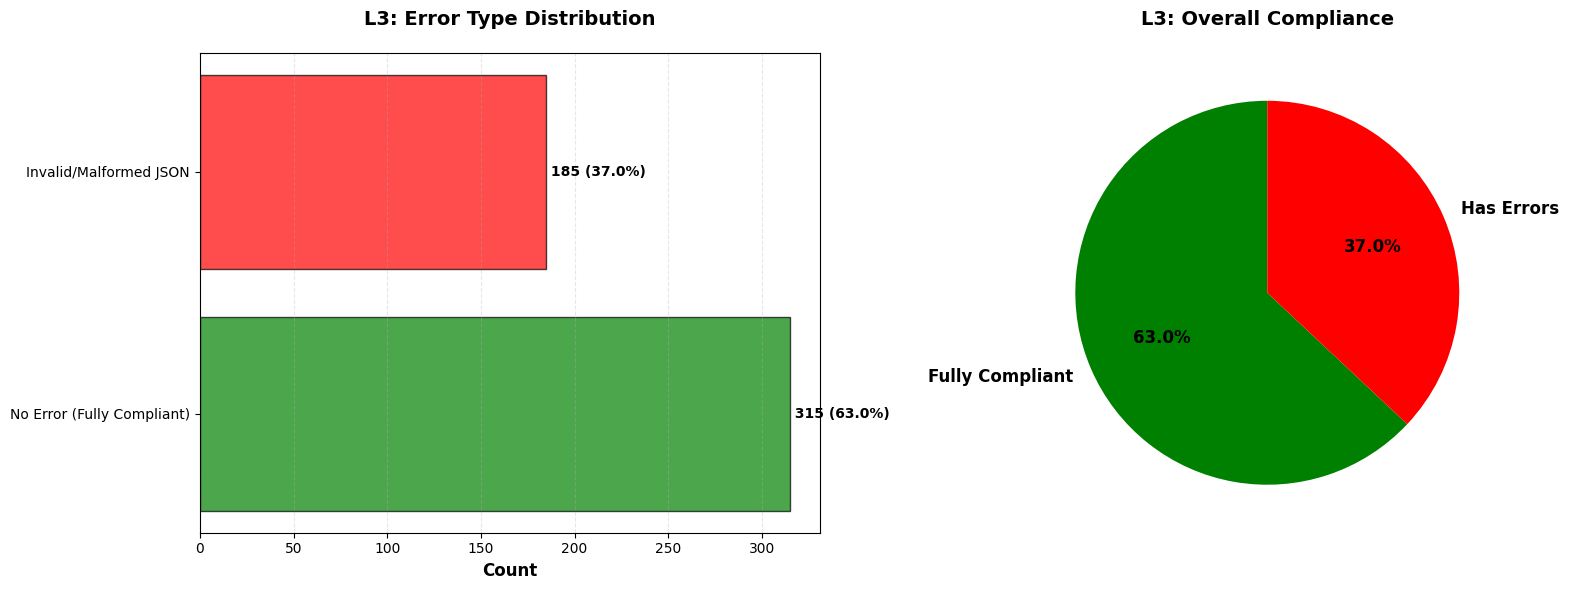


Detailed Error Breakdown:
  Samples with valid JSON but missing fields:
    - Missing answer field: 0
    - Missing reasoning field: 0

  Samples with both fields but invalid reasoning length:
    - Reasoning too short (<10 chars): 0
    - Reasoning too long (>200 chars): 0

  Samples with malformed JSON:
    - Invalid/malformed JSON: 185

  Fully compliant samples:
    - No errors: 315 (63.0%)


In [21]:
# 5) Error Analysis
print("="*60)
print("5) ERROR ANALYSIS (L3)")
print("="*60)

error_counts = Counter(l3_errors)
total_errors = len([e for e in l3_errors if e is not None])

print(f"Total samples: {len(l3_answers)}")
print(f"Samples with errors: {total_errors} ({total_errors/len(l3_answers)*100:.1f}%)")
print(f"\nError Type Distribution:")

# Define error categories
error_categories = {
    'invalid_json': 'Invalid/Malformed JSON',
    'missing_answer': 'Missing Answer Field',
    'missing_reasoning': 'Missing Reasoning Field',
    'reasoning_too_short': 'Reasoning Too Short (<10 chars)',
    'reasoning_too_long': 'Reasoning Too Long (>200 chars)',
    'unknown': 'Unknown Error',
    None: 'No Error (Fully Compliant)'
}

error_data = []
for error_type, count in error_counts.most_common():
    label = error_categories.get(error_type, error_type or 'No Error')
    pct = count/len(l3_answers)*100
    error_data.append((label, count, pct))
    print(f"  {label}: {count} ({pct:.1f}%)")

# Visualize error distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of error types
error_labels = [d[0] for d in error_data]
error_counts_list = [d[1] for d in error_data]
error_colors = ['green' if 'No Error' in label else 'red' if 'Invalid' in label or 'Missing' in label else 'orange' 
                for label in error_labels]

bars = ax1.barh(error_labels, error_counts_list, color=error_colors, alpha=0.7, edgecolor='black')
for i, (bar, count, pct) in enumerate(zip(bars, error_counts_list, [d[2] for d in error_data])):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
             f' {count} ({pct:.1f}%)',
             ha='left', va='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('L3: Error Type Distribution', fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
plt.setp(ax1.get_yticklabels(), fontsize=10)

# Pie chart of error vs success
success_count = error_counts.get(None, 0)
failure_count = total_errors
pie_data = [success_count, failure_count]
pie_labels = ['Fully Compliant', 'Has Errors']
pie_colors = ['green', 'red']

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
        colors=pie_colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('L3: Overall Compliance', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Detailed breakdown of non-compliant samples
print(f"\nDetailed Error Breakdown:")
print(f"  Samples with valid JSON but missing fields:")
missing_answer = error_counts.get('missing_answer', 0)
missing_reasoning = error_counts.get('missing_reasoning', 0)
print(f"    - Missing answer field: {missing_answer}")
print(f"    - Missing reasoning field: {missing_reasoning}")

print(f"\n  Samples with both fields but invalid reasoning length:")
too_short = error_counts.get('reasoning_too_short', 0)
too_long = error_counts.get('reasoning_too_long', 0)
print(f"    - Reasoning too short (<10 chars): {too_short}")
print(f"    - Reasoning too long (>200 chars): {too_long}")

print(f"\n  Samples with malformed JSON:")
invalid_json = error_counts.get('invalid_json', 0)
print(f"    - Invalid/malformed JSON: {invalid_json}")

print(f"\n  Fully compliant samples:")
print(f"    - No errors: {success_count} ({success_count/len(l3_answers)*100:.1f}%)")
print("="*60)
